In [1]:
# 함수를 이용한 모델 평가

In [5]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 16.0 MB/s 


In [6]:
import torch
import torchmetrics

In [14]:
data = torch.randn(10,5)

In [17]:
data

tensor([[ 1.7504, -2.2637,  0.4723,  0.7613,  0.0341],
        [-0.3362, -0.5438,  1.4566,  0.1889, -1.1762],
        [-1.0680, -0.7023, -1.3531, -1.4908,  0.6748],
        [ 0.3619, -1.0675, -1.1103,  0.4937,  0.7467],
        [-0.6939, -0.6474, -0.9761, -0.6145, -1.0978],
        [ 0.6887,  0.0881,  0.8646,  0.5578, -0.6461],
        [-0.6600, -0.0370,  0.9816, -0.1946,  1.2022],
        [-1.1859, -1.3343, -2.0385,  0.0992,  0.3083],
        [-0.1782, -0.0937,  0.2461,  0.6549, -0.9012],
        [ 0.3636, -0.3206,  0.2594, -0.4649, -0.9770]])

In [15]:
data.softmax(dim=-1)

tensor([[0.5410, 0.0098, 0.1507, 0.2012, 0.0972],
        [0.1006, 0.0817, 0.6042, 0.1701, 0.0434],
        [0.1046, 0.1508, 0.0786, 0.0685, 0.5975],
        [0.2451, 0.0587, 0.0562, 0.2797, 0.3602],
        [0.2197, 0.2301, 0.1657, 0.2378, 0.1467],
        [0.2576, 0.1413, 0.3072, 0.2260, 0.0678],
        [0.0623, 0.1161, 0.3215, 0.0992, 0.4009],
        [0.0965, 0.0832, 0.0412, 0.3490, 0.4301],
        [0.1562, 0.1700, 0.2387, 0.3593, 0.0758],
        [0.3222, 0.1625, 0.2903, 0.1407, 0.0843]])

In [33]:
preds = data.softmax(dim=-1)
target = torch.randint(5,(10,))

In [34]:
target

tensor([0, 1, 1, 3, 4, 1, 4, 2, 0, 4])

In [27]:
acc = torchmetrics.functional.accuracy(preds,target)

In [28]:
acc

tensor(0.2000)

In [37]:
# 함수를 이용한 평가
preds = data.softmax(dim=-1)
target = torch.randint(5,(10,))
acc = torchmetrics.functional.accuracy(preds,target)
print(f"accuracy : {acc}")

accuracy : 0.20000000298023224


In [36]:
# 모듈을 이용해서 평가
acc =  torchmetrics.Accuracy()
n_batches = 10
for i in range(n_batches):
  preds = torch.randn(10,5).softmax(dim=-1)
  target = torch.randint(5,(10,))
  accuracy = acc(preds,target)
  print(f"Accuracy on batch {i} : {accuracy}")
accuracy = acc.compute()
print(f"Accuracy on all batch : {accuracy}")  

Accuracy on batch 0 : 0.10000000149011612
Accuracy on batch 1 : 0.20000000298023224
Accuracy on batch 2 : 0.5
Accuracy on batch 3 : 0.30000001192092896
Accuracy on batch 4 : 0.4000000059604645
Accuracy on batch 5 : 0.10000000149011612
Accuracy on batch 6 : 0.20000000298023224
Accuracy on batch 7 : 0.10000000149011612
Accuracy on batch 8 : 0.10000000149011612
Accuracy on batch 9 : 0.10000000149011612
Accuracy on all batch : 0.20999999344348907


In [38]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
dataset  = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung4/ml0719/main/data/car_evaluation.csv')

In [41]:
# 문자형 데이터를 처리 - 임베딩 처리가필요

In [109]:
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


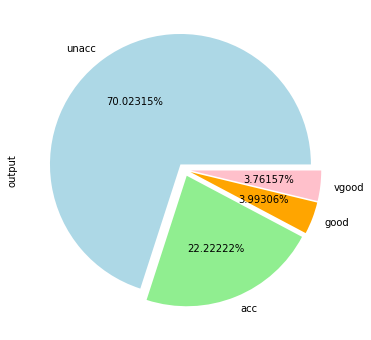

In [110]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))

In [111]:
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']

In [112]:
for category in categorical_columns:
    dataset[category] = dataset[category].astype('category')

In [113]:
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [114]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [115]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [116]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [117]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [118]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345
